In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from collections import Counter

In [2]:
X = np.genfromtxt("X_train.csv", delimiter=',', dtype=str)[1:]
Y = np.genfromtxt("Y_train.csv", delimiter=',', dtype=float)[1:, 1:]
#transmission = copy.copy(X[:, 3:4])
odometer = copy.copy(X[:, 5:6]).astype('int64')
engineCapacity = np.genfromtxt("X_train.csv", delimiter=',',
                               dtype=float)[1:, 9:10]
photos = copy.copy(X[:, 12:13]).astype('int64')
features = np.genfromtxt("X_train.csv", delimiter=',', dtype=bool)[1:, 13:]
num_features = np.sum(features, axis=1)

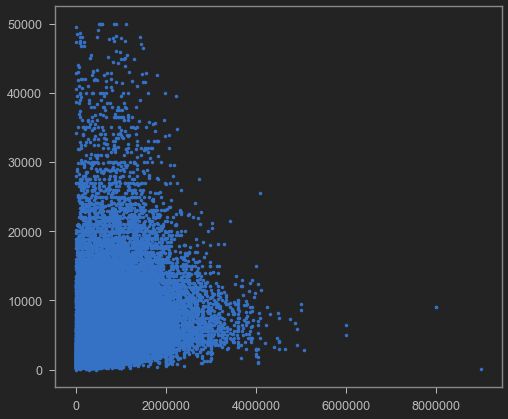

In [10]:
# Biến odometer có ảnh hưởng đến output không?
plt.plot(odometer*(num_features.reshape((num_features.shape[0],1))), Y, '.')

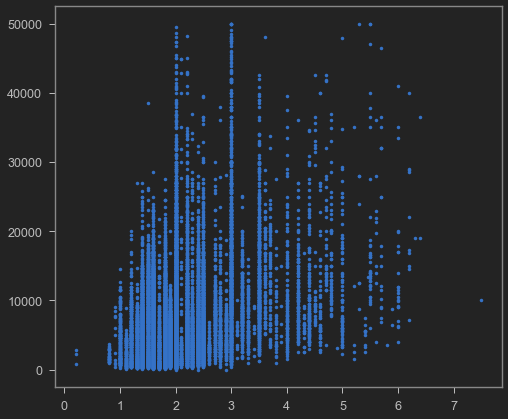

In [4]:
# Biến engineCapacity có ảnh hưởng đến output không?
plt.plot(engineCapacity, Y, '.')

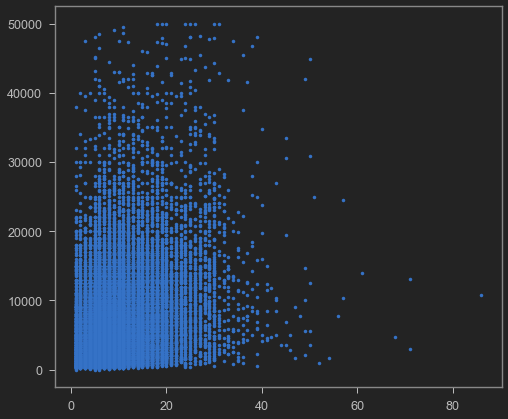

In [5]:
# Biến photos?
plt.plot(photos, Y, '.')

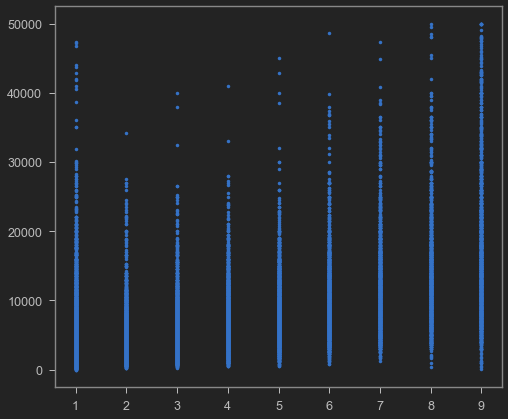

In [6]:
# Biến num_features?
plt.plot(num_features, Y, '.')

In [7]:
def transfered(X):
    # add code here

SyntaxError: unexpected EOF while parsing (<ipython-input-7-97899a783490>, line 2)

In [ ]:
def err_out(transfered_X, Y):
    idx = 0
    N = transfered_X.shape[0]
    err = 0
    for _ in range (10):
        pre_idx = copy.copy(idx)
        idx += N
        X_test = copy.copy(transfered_X[pre_idx:idx,:])
        Y_test = copy.copy(Y[pre_idx:i,:])
        X_train = copy.copy(np.delete(transfered_X, [pre_idx:idx,:]))
        Y_train = copy.copy(np.delete(Y, [pre_idx:idx,:]))
        w = np.linalg.pinv(X_train) @ Y_train
        err += np.mean(w.T @ X_test != Y_test) / 10
    return err